Для начала импортируем необходимые модули

In [10]:
import os
import numpy as np
from PIL import Image
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

Объявим директорию, откуда будет браться датасет, и далее реализуем функцию загрузки и обработки датасета для обучения

In [11]:
# Define the root directory containing the dataset
root_dir = "C:\\Users\\Алина\\Desktop\\kak\\neuron_network\\archive\\train"

# Define the function to load the dataset
def load_dataset(root_dir):
    X = []
    Y = []
    label_mapping = {}

    label = 0
    for foldername in os.listdir(root_dir):
        label_mapping[label] = foldername
        folderpath = os.path.join(root_dir, foldername)

        for filename in os.listdir(folderpath):
            filepath = os.path.join(folderpath, filename)
            image = Image.open(filepath)
            image = image.resize((16, 16))
            image_array = np.array(image)
            X.append(image_array)
            Y.append(label)

        label += 1
    X = np.array(X)
    Y = np.array(Y)

    return X, Y, label_mapping


Загрузка датасета, распределение на тестовую и обучающие выборки

In [12]:
X, Y, label_mapping = load_dataset(root_dir)
scaler = MinMaxScaler()
X_flattened = X.reshape(len(X), -1)
X_scaled = scaler.fit_transform(X_flattened)


enc = OneHotEncoder(categories='auto')
Y_onehot = enc.fit_transform(Y.reshape(-1, 1)).toarray()


X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y_onehot, test_size=0.1, random_state=42)

Непосредственно класс, реализующий машину экстримального обучения с 900 нейронами скрытого слоя, что является оптимальным для датасета с таким большим количеством классов

In [14]:
# ELM class implementation
class ELM:
    def __init__(self, d=900, gamma=1e-6):
        self.d = d
        self.gamma = gamma
        self.alpha = None
        self.beta = None
        self.b_vec = None

    def make_alpha(self, m):
        return np.random.uniform(-1, 1, size=(self.d, m))

    def make_b_vec(self):
        return np.random.uniform(-1, 1, size=(self.d,))

    def compute_b(self, n):
        return np.tile(self.b_vec, (n, 1))

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def compute_h(self, v):
        return self.sigmoid(np.dot(v, self.alpha.T) + self.compute_b(v.shape[0]))

    def make_i(self):
        return np.eye(self.d)

    def compute_hp(self, h):
        i = self.make_i()
        return np.linalg.inv(np.dot(h.T, h) + self.gamma * i).dot(h.T)

    def compute_beta(self, hp, y):
        return np.dot(hp, y.reshape(-1, y.shape[-1]))

    def fit(self, X_train, Y_train):
        m = X_train.shape[1]
        self.alpha = self.make_alpha(m)
        self.b_vec = self.make_b_vec()
        h = self.compute_h(X_train)
        hp = self.compute_hp(h)
        self.beta = self.compute_beta(hp, Y_train)

    def predict(self, X_test):
        h_test = self.compute_h(X_test)
        y_pred = np.dot(h_test, self.beta)
        return y_pred

Инициализация и тестирование модели машины экстримального обучения

In [15]:
# Initialize ELM model
elm = ELM()
elm.fit(X_train, Y_train)
Y_pred = elm.predict(X_test)
accuracy = (Y_pred.argmax(axis=1) == Y_test.argmax(axis=1)).mean()
print("Accuracy:", round(accuracy * 100), "%")

Accuracy: 97 %


Результат работы модели
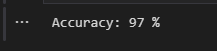